In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline
sns.set(font_scale=2)

from sklearn.decomposition import PCA

from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Train Neural Network

In [3]:
#데이터 구문 분석 및 준비 : 다음 셀은 csv 파일을 구문 분석하고 완전히 연결된 신경망을 훈련하는 데 사용할 형식으로 변환합니다.
#.csv 형식으로 수집 한 제스처 데이터로 제스처 목록을 업데이트합니다.

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# 노트북이 실행될 때마다 동일한 난수
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = [
    "punch","flex","triangle","star","square","shaking",
    "a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"
]

SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv(gesture + ".csv")

  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]


    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")
print(inputs.shape)
print(outputs.shape)


TensorFlow version = 2.3.1

Processing index 0 for gesture 'punch'.
	There are 30 recordings of the punch gesture.
Processing index 1 for gesture 'flex'.
	There are 30 recordings of the flex gesture.
Processing index 2 for gesture 'triangle'.
	There are 30 recordings of the triangle gesture.
Processing index 3 for gesture 'star'.
	There are 30 recordings of the star gesture.
Processing index 4 for gesture 'square'.
	There are 30 recordings of the square gesture.
Processing index 5 for gesture 'shaking'.
	There are 30 recordings of the shaking gesture.
Processing index 6 for gesture 'a'.
	There are 30 recordings of the a gesture.
Processing index 7 for gesture 'b'.
	There are 30 recordings of the b gesture.
Processing index 8 for gesture 'c'.
	There are 30 recordings of the c gesture.
Processing index 9 for gesture 'd'.
	There are 30 recordings of the d gesture.
Processing index 10 for gesture 'e'.
	There are 30 recordings of the e gesture.
Processing index 11 for gesture 'f'.
	There ar

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, test_size=0.5, random_state=321)
print(X_train.shape, Y_train.shape)
print(X_test.shape,Y_test.shape)

(480, 714) (480, 32)
(480, 714) (480, 32)


# linear regression

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=500,verbose =0)
model.summary()
lin_acc = model.evaluate(X_test, Y_test, verbose = 2)
print(lin_acc)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (32, 32)                  22880     
Total params: 22,880
Trainable params: 22,880
Non-trainable params: 0
_________________________________________________________________
15/15 - 0s - loss: 0.0075 - accuracy: 0.8667
[0.007502538617700338, 0.8666666746139526]


# DNN

In [4]:
node = 5
accuracy = []
counts = []
loss = []

# count = int(((300 - 10) / 5) + 1)
for l in range(10,300,5):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(l,input_shape=(714,), activation='relu'))
    model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax'))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=1000,verbose =0)
    model.summary()
    test_acc = model.evaluate(X_test, Y_test, verbose = 2)
    accuracy.append(test_acc[1])
    loss = history.history['loss']
    loss.append(loss[1])
    counts.append(model.count_params()) 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7150      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                352       
Total params: 7,502
Trainable params: 7,502
Non-trainable params: 0
_________________________________________________________________
15/15 - 0s - loss: 0.0287 - accuracy: 0.0958
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                10725     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                512       
Total params: 11,237
Trainable params: 11,237
Non-trainable params: 0
_________________________________________________

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 75)                53625     
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2432      
Total params: 56,057
Trainable params: 56,057
Non-trainable params: 0
_________________________________________________________________
15/15 - 0s - loss: 0.0060 - accuracy: 0.8792
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 80)                57200     
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2592      
Total params: 59,792
Trainable params: 59,792
Non-trainable params: 0
___________________________________________

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 140)               100100    
_________________________________________________________________
dense_53 (Dense)             (None, 32)                4512      
Total params: 104,612
Trainable params: 104,612
Non-trainable params: 0
_________________________________________________________________
15/15 - 0s - loss: 0.0046 - accuracy: 0.9062
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 145)               103675    
_________________________________________________________________
dense_55 (Dense)             (None, 32)                4672      
Total params: 108,347
Trainable params: 108,347
Non-trainable params: 0
_______________________________________

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 205)               146575    
_________________________________________________________________
dense_79 (Dense)             (None, 32)                6592      
Total params: 153,167
Trainable params: 153,167
Non-trainable params: 0
_________________________________________________________________
15/15 - 0s - loss: 0.0039 - accuracy: 0.9187
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 210)               150150    
_________________________________________________________________
dense_81 (Dense)             (None, 32)                6752      
Total params: 156,902
Trainable params: 156,902
Non-trainable params: 0
_______________________________________

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 270)               193050    
_________________________________________________________________
dense_105 (Dense)            (None, 32)                8672      
Total params: 201,722
Trainable params: 201,722
Non-trainable params: 0
_________________________________________________________________
15/15 - 0s - loss: 0.0051 - accuracy: 0.9000
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 275)               196625    
_________________________________________________________________
dense_107 (Dense)            (None, 32)                8832      
Total params: 205,457
Trainable params: 205,457
Non-trainable params: 0
_______________________________________

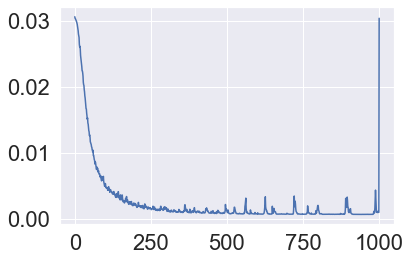

In [5]:
plt.plot(loss)

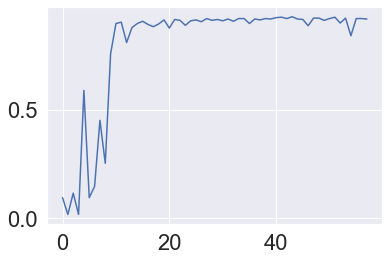

In [6]:
plt.plot(accuracy)

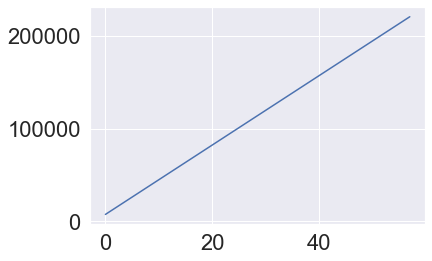

In [11]:
plt.plot(counts)

In [8]:
for i in range(0,58):
    if (accuracy[i] >= 0.92000):
        print(i,accuracy[i])


27 0.9208333492279053
38 0.9229166507720947
41 0.9229166507720947
47 0.9229166507720947
51 0.9208333492279053
52 0.9208333492279053
55 0.9229166507720947
56 0.9208333492279053
57 0.9208333492279053


In [9]:
print(len(accuracy))
cou = 0 - 1
for a in range(10,300,5) :
    res = a
    cou = cou + 1
    print(cou, res)

58
0 10
1 15
2 20
3 25
4 30
5 35
6 40
7 45
8 50
9 55
10 60
11 65
12 70
13 75
14 80
15 85
16 90
17 95
18 100
19 105
20 110
21 115
22 120
23 125
24 130
25 135
26 140
27 145
28 150
29 155
30 160
31 165
32 170
33 175
34 180
35 185
36 190
37 195
38 200
39 205
40 210
41 215
42 220
43 225
44 230
45 235
46 240
47 245
48 250
49 255
50 260
51 265
52 270
53 275
54 280
55 285
56 290
57 295


# Keras 최종확인

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(265,input_shape=(714,), activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=1000,verbose =0)
model.summary()
lin_acc = model.evaluate(X_test, Y_test, verbose = 2)
print(lin_acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 265)               189475    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8512      
Total params: 197,987
Trainable params: 197,987
Non-trainable params: 0
_________________________________________________________________
15/15 - 0s - loss: 0.0040 - accuracy: 0.9167
[0.004048768896609545, 0.9166666865348816]


In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200,input_shape=(714,), activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=1000,verbose =0)
model.summary()
lin_acc = model.evaluate(X_test, Y_test, verbose = 2)
print(lin_acc)

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 200)               143000    
_________________________________________________________________
dense_119 (Dense)            (None, 32)                6432      
Total params: 149,432
Trainable params: 149,432
Non-trainable params: 0
_________________________________________________________________
15/15 - 0s - loss: 0.0039 - accuracy: 0.9187
[0.0039001465775072575, 0.918749988079071]


In [60]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,input_shape=(714,), activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=1000,verbose =0)
model.summary()
lin_acc = model.evaluate(X_test, Y_test, verbose = 2)
print(lin_acc)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                14300     
_________________________________________________________________
dense_17 (Dense)             (None, 32)                672       
Total params: 14,972
Trainable params: 14,972
Non-trainable params: 0
_________________________________________________________________
15/15 - 0s - loss: 0.0284 - accuracy: 0.0958
[0.028449280187487602, 0.09583333134651184]


# 직선의 방정식 만들기

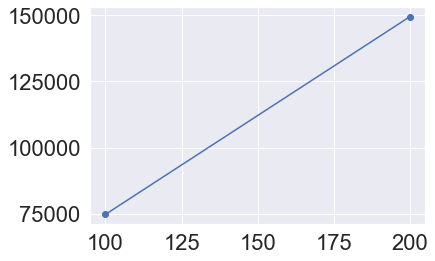

In [10]:
node1 = 100
node2 = 200
param1 = 74732
param2 = 149432
plt.plot((node1,node2),(param1,param2), marker='o')

In [15]:
#y = a*x + b
x1 = 100
y1 = 74732
x2 = 200
y2 = 149432

a = (74732 - 149432) / (100 - 200)
print("기울기",a)
b = y1 - (a * x1)
print("y절편",b)

x = 135
y = a * x + b

print(y)


기울기 747.0
y절편 32.0
100877.0


In [15]:
# 확률 볼 수 있는 직선의 방정식
x1 = 7502
y1 = 36
x2 = 44852
y2 = 93

a = (y2 - y1) / (x2 - x1)
print("기울기",a)
b = y1 - (a * x1)
print("y절편",b)

x = 5002
y = a * x + b

print(y)


기울기 0.0015261044176706827
y절편 24.55116465863454
32.18473895582329


# PCA 방식으로 뉴런의 개수 고르기

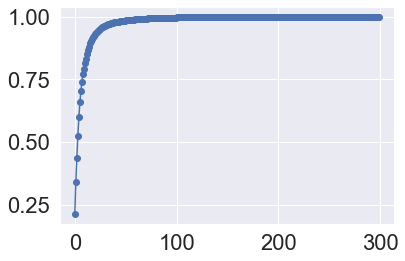

258


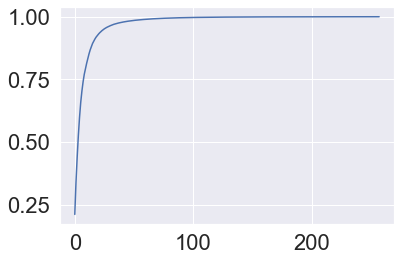

In [16]:
pca = PCA(n_components=300)
pca.fit(X_train)

var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(var,marker='o')
plt.show()

m = np.where( var > 0.9999)[0][0]
print(m)

plt.plot(var[0:m])

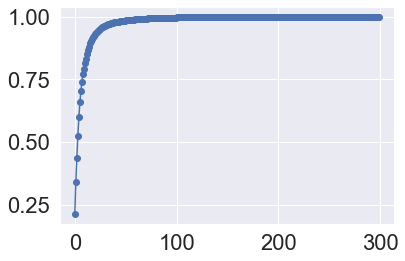

In [17]:
var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(var,marker ='o')
plt.show()


# 1D CNN으로

In [5]:

X = inputs.reshape(-1, 119,6)
# Y = np.argmax(outputs, axis=1)
Y = outputs
print(X.shape)
print(Y.shape)


(960, 119, 6)
(960, 32)


In [6]:
X_train_CNN, X_test_CNN, Y_train_CNN, Y_test_CNN = train_test_split(X, Y, test_size=0.5, random_state=321)
print(X_train_CNN.shape)
print(X_test_CNN.shape)
print(Y_train_CNN.shape)
print(Y_test_CNN.shape)

(480, 119, 6)
(480, 119, 6)
(480, 32)
(480, 32)


In [24]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(119,6)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(119,6)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(NUM_GESTURES, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_CNN, Y_train_CNN, epochs=500,  verbose=0)

In [7]:
model = Sequential()
model.add(Conv1D(filters=10, kernel_size=3, activation='relu', input_shape=(119,6)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=10, kernel_size=3, activation='relu', input_shape=(119,6)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=10, kernel_size=3, activation='relu', input_shape=(119,6)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(NUM_GESTURES, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_CNN, Y_train_CNN, epochs=500,  verbose=0)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 117, 10)           190       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 58, 10)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 56, 10)            310       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 28, 10)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 26, 10)            310       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 13, 10)            0         
_________________________________________________________________
flatten (Flatten)            (None, 130)               0

In [9]:
test_loss, test_acc = model.evaluate(X_test_CNN, Y_test_CNN, verbose = 2)
print(test_acc)

15/15 - 0s - loss: 1.2672 - accuracy: 0.9146
0.9145833253860474


# Confusion Matrix

In [13]:
predictions = model.predict(X_test)
predict = np.argmax(predictions, axis=1)
y = np.argmax(Y_test,axis=1)
print(np.shape(np.argmax(predictions, axis=1)))
print(np.argmax(Y_test[0]))
print(np.shape(np.argmax(Y_test,axis=1)))
print(predict.shape,y.shape)

(480,)
12
(480,)
(480,) (480,)


In [14]:
a = confusion_matrix(predict, y)
print(a.shape)
print(a)

(32, 32)
[[15  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0 14  0]
 [ 0  0  0 ...  0  0 12]]


In [15]:
print(a / np.sum(a))

[[0.03125    0.         0.         ... 0.         0.         0.        ]
 [0.         0.02291667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.02083333 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.03958333 0.         0.        ]
 [0.         0.         0.         ... 0.         0.02916667 0.        ]
 [0.         0.         0.         ... 0.         0.         0.025     ]]


# 훈련 된 모델을 Tensor Flow Lite로 변환

In [10]:

# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)


In [11]:
tflite_model = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /var/folders/s5/2gnb160n5_7gn5qjnmpcj8hc0000gn/T/tmp29xph0k8/assets


In [12]:
# Save the model to disk
open("model.tflite", "wb").write(tflite_model)


25944

In [13]:
basic_model_size = os.path.getsize("model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 25944 bytes


# Arduino 헤더 파일에 모델 인코딩
다음 셀은 TFlite 모델을 포함하는 상수 바이트 배열을 만듭니다. 아래 스케치를 사용하여 탭으로 가져옵니다.

In [14]:
!xxd -i model.tflite > model.h

model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 160,062 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
